In [55]:
# Import required libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [57]:
# Import the Dataset
dataset = pd.read_csv("disease.csv")

In [58]:
# View the number of rows and columns in our dataset
dataset.shape

(768, 10)

In [59]:
# Inspect the first five records of the dataset
dataset.head()

,Age,BMI,NumPregnancies,GlucoseLevel,BloodPressure,Colesterol,SkinThickness,Insulin,DPF,Outcome
0,50,33.6,6,148,72,227,35,0,0.627,Disease
1,31,26.6,1,85,66,0,29,0,0.351,No Disease
2,32,23.3,8,183,64,242,0,0,0.672,Disease
3,21,28.1,1,89,66,0,23,94,0.167,No Disease
4,33,43.1,0,137,40,167,35,168,2.288,Disease


In [60]:
# Divide the data into attributes and labels
x = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
#convery category data to num data
y=y.astype('category').cat.codes

In [61]:
# Here the X variable contains all the columns from the dataset, except the "Class" column. 
# The y variable contains the values from the "Class" column. 
# The X variable is the attribute set and y variable contains corresponding labels.

In [62]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [63]:
# The model_selection library of Scikit-Learn contains train_test_split method.
# We can use it to randomly split the data into training and testing sets.
# The test_size parameter specifies the ratio of the test set.
# We to split up 20% of the data in to the test set and 80% for training.

In [64]:
# Now we can train the logistic regression algorithm on this data and make predictions. 
# Scikit-Learn contains the linear model library, which contains built-in classes/methods for various logistic regression algorithms.

In [65]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=100)
# fit the model with data
logreg.fit(x_train,y_train)

c:\users\jingr\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [67]:
# Now we can make predictions on the test data. 
# To make predictions, the predict method is used.

In [68]:
y_pred=logreg.predict(x_test)

In [69]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


In [70]:
# Download the disease.csv and create a Jupyter Notebook “LogisticRegressionDisease.ipynb”. Do the following

#     a) Clean the dataset if necessary

#     b) Perform preprocessing if necassary

#     c) Calculate the accuracy of prediction of "Outcome" when the maximum number of iterations taken for the solvers to converge is
#          i) 10
#         ii) 25
#        iii) 50
#         iv) 100
#        What is your observation?

#     e) Submit the “LogisticRegressionDisease.ipynb”

In [71]:
# Model Accuracy, Precision and Recall
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7857142857142857
Precision: 0.8407079646017699
Recall: 0.8636363636363636


In [72]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[26, 18],
       [15, 95]], dtype=int64)

In [73]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [74]:
# Computing the Receiver operating characteristic (ROC)
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,  y_pred_proba)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8214876033057852

In [75]:
# For more information refer
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

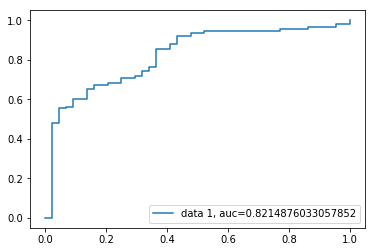

In [76]:
# Plotting the ROC curve
# import required modules
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [77]:
# Start with the Jupyter Notebook “LogisticRegressionDisease.ipynb” you created for the assignment in week 8. Do the following

#     a) Print the Accuracy, Precision and Recall for your model

#     b) Print the confusion matrix

#     c) Print the ROC AUC from prediction scores

#     d) Plot the ROC curve

#     e) Submit the “LogisticRegressionDisease.ipynb”